In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
symbol = 'AAPL'
start = '2010-01-01'
end = '2021-12-31'
df = yf.download(symbol, start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507524,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.753922,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.768845,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.737839,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.827072,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,176.657288,59773000


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507524,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.753922,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.768845,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.737839,79144300


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507524,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


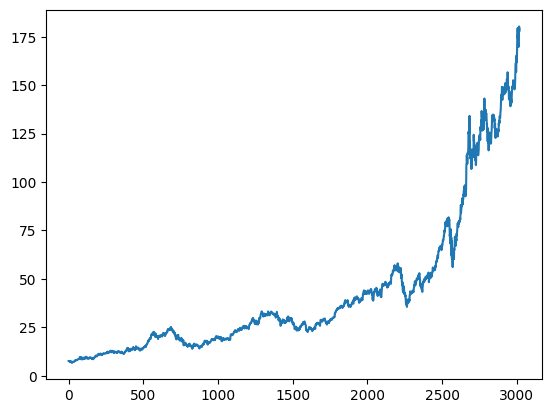

In [7]:
 plt.plot(df.Close)


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3015    153.0106
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
Name: Close, Length: 3020, dtype: float64

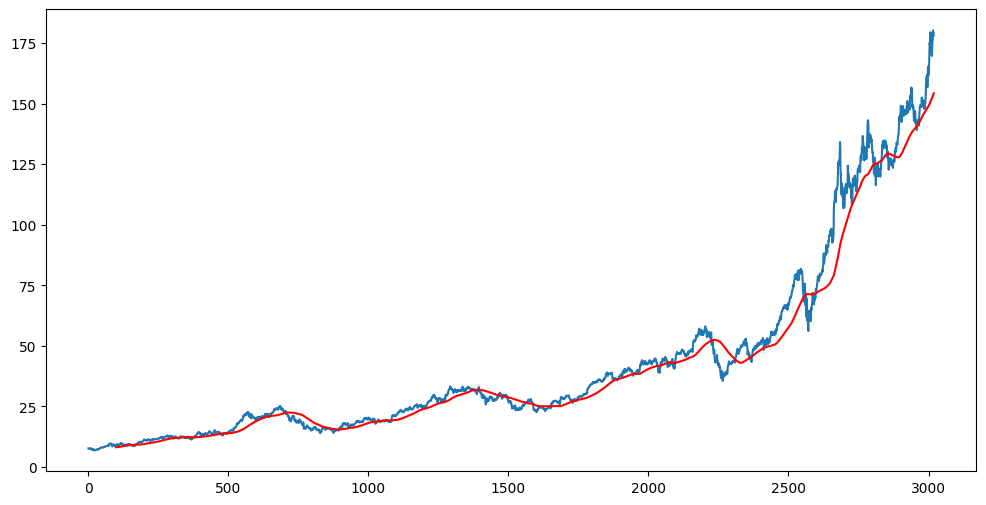

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3015    142.55920
3016    142.85570
3017    143.13220
3018    143.40125
3019    143.66845
Name: Close, Length: 3020, dtype: float64

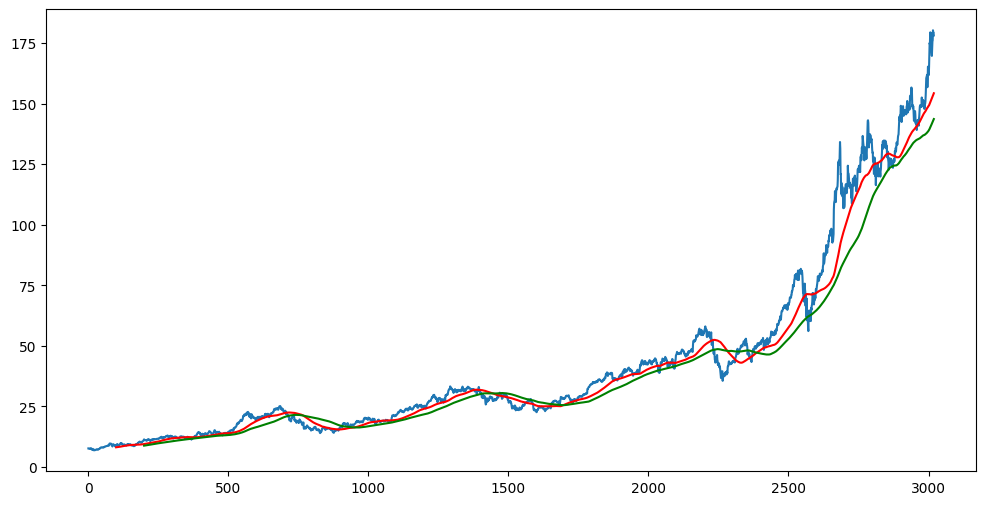

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape


(3020, 5)

In [13]:
# Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [14]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_testing.head()


,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [18]:
x_train = []
y_train = []
for i in range(100, data_training.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation= 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 50, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 20s 207ms/step - loss: 0.0542
Epoch 2/50
63/63 [==============================] - 12s 197ms/step - loss: 0.0126
Epoch 3/50
63/63 [==============================] - 13s 201ms/step - loss: 0.0113
Epoch 4/50
63/63 [==============================] - 12s 184ms/step - loss: 0.0108
Epoch 5/50
63/63 [==============================] - 12s 196ms/step - loss: 0.0100
Epoch 6/50
63/63 [==============================] - 13s 214ms/step - loss: 0.0086
Epoch 7/50
63/63 [==============================] - 13s 206ms/step - loss: 0.0090
Epoch 8/50
63/63 [==============================] - 13s 200ms/step - loss: 0.0086
Epoch 9/50
63/63 [==============================] - 13s 208ms/step - loss: 0.0083
Epoch 10/50
63/63 [==============================] - 14s 214ms/step - loss: 0.0074
Epoch 11/50
63/63 [==============================] - 12s 184ms/step - loss: 0.0078
Epoch 12/50
63/63 [==============================] - 13s 199ms/step - loss: 0.0068
Epoch 13/50
6

In [23]:
model.save('keras1_model.h5')

In [24]:
data_testing.head()


,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [25]:
past_100_days = data_training.tail(100)

In [29]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [30]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99281675],
       [0.99343845],
       [0.98528824]])

In [32]:
input_data.shape

(1006, 1)

In [33]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [35]:
# Making Predictions
y_predicted = model.predict(x_test)
y_predicted.shape

29/29 [==============================] - 3s 69ms/step


(906, 1)

In [36]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [37]:
y_predicted

array([[0.14048031],
       [0.1412192 ],
       [0.14187458],
       [0.14244854],
       [0.14295736],
       [0.14343113],
       [0.14390218],
       [0.14439777],
       [0.1449309 ],
       [0.14549428],
       [0.14606842],
       [0.14663798],
       [0.14718527],
       [0.14769307],
       [0.14814246],
       [0.14851694],
       [0.14879605],
       [0.14896727],
       [0.14902735],
       [0.14897785],
       [0.14881627],
       [0.14855304],
       [0.14820968],
       [0.14781445],
       [0.1473952 ],
       [0.14698249],
       [0.14659065],
       [0.1462264 ],
       [0.1459077 ],
       [0.14566222],
       [0.14551136],
       [0.14545265],
       [0.14548263],
       [0.14560166],
       [0.1458014 ],
       [0.14606977],
       [0.14638847],
       [0.14674243],
       [0.14711916],
       [0.14750597],
       [0.14789823],
       [0.1483029 ],
       [0.14872456],
       [0.14914662],
       [0.14954117],
       [0.14988719],
       [0.15022269],
       [0.150

In [39]:
print(y_predicted[:5])

[[0.14048031]
 [0.1412192 ]
 [0.14187458]
 [0.14244854]
 [0.14295736]]


In [40]:
scaler.scale_


array([0.00690691])

In [41]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

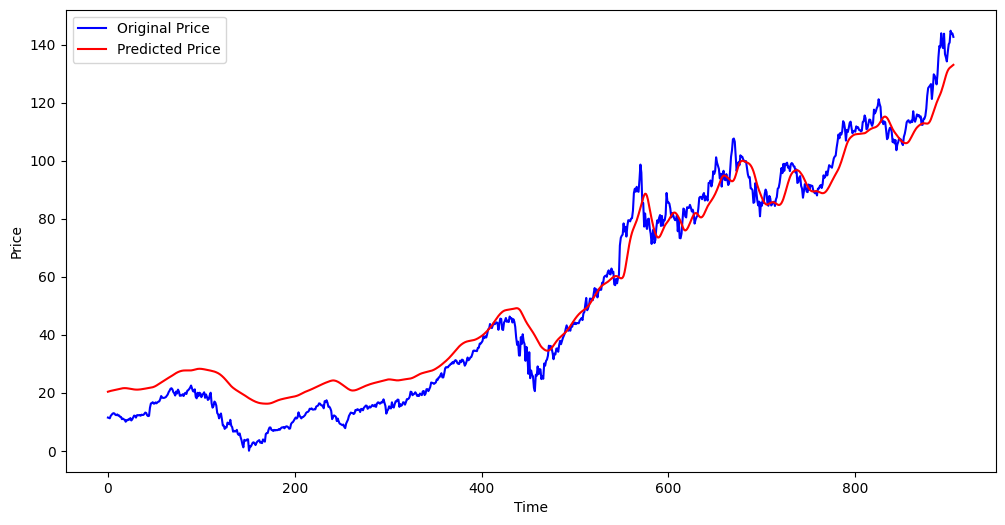

In [42]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()